In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# cv2.__version__ == '4.1.0' https://docs.opencv.org/4.1.0/

# obs.: Notebook shortcuts: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [2]:
from glob import iglob
from os.path import basename, splitext, join

## Improve display quality on the notebook
**Note:** although we'll set a higher dpi for showing images, there are still (many) artifacts introduced when seeing them inside the notebook, thus, you should always check the images saved to the output folder (`o/`).

In [3]:
%matplotlib inline

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 60 # 150 to 300 are good values

## Define print functions

In [5]:
def show(bgr_img, img_title=""):
    plt.axis('off')
    plt.title(img_title)
    rgb_img = cv2.cvtColor(bgr_img.astype('uint8'), cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img, vmin=0, vmax=255)

In [6]:
def show_grayscale(bgr_img, img_title=""):
    plt.axis('off')
    plt.title(img_title)
    gray_img = cv2.cvtColor(bgr_img.astype('uint8'), cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)

In [7]:
def show_in_row(rgb_images, grayscale=False):
    fig = plt.figure(figsize=(16, 16))
    n_of_rows = len(rgb_images)
    for i in range(n_of_rows):
        a = fig.add_subplot(1, n_of_rows, i + 1)
        if not grayscale:
            plt.imshow(rgb_images[i], vmin=0, vmax=255)
        else:
            plt.imshow(cv2.cvtColor(rgb_images[i].astype('uint8'), cv2.COLOR_BGR2GRAY), cmap='gray', vmin=0, vmax=255)
        plt.axis('off')

In [8]:
def show_split(bgr_img, img_title="", grayscale=False):
    rgb_img = cv2.cvtColor(bgr_img.astype('uint8'), cv2.COLOR_BGR2RGB)
    height, width, _ = rgb_img.shape
    zeros = np.zeros((height, width), dtype='uint8')
    r_img = np.dstack((rgb_img[..., 0], zeros, zeros))
    g_img = np.dstack((zeros, rgb_img[..., 1], zeros))
    b_img = np.dstack((zeros, zeros, rgb_img[..., 2]))
    show_in_row([rgb_img, r_img, g_img, b_img], grayscale)

## Load examples

In [9]:
# load image examples into an array of tuples: (img: np.ndarray, img_name: str)
examples = []
for img_fname in iglob("o/*.png"):
    img_name = splitext(basename(img_fname))[0]
    img = cv2.imread(img_fname)
    examples.append((img, img_name))

In [10]:
[(i, img_fname) for i, (_, img_fname) in enumerate(examples)]

[(0, 'baboon-0'),
 (1, 'cornellbox-0'),
 (2, 'cornellbox-1'),
 (3, 'cornellbox-2'),
 (4, 'cornellbox-3'),
 (5, 'cornellbox-4'),
 (6, 'cornellbox-5'),
 (7, 'cornellbox-6'),
 (8, 'cornellbox-7'),
 (9, 'lenna-decode-0'),
 (10, 'lenna-decode-7'),
 (11, 'lenna-encode-0'),
 (12, 'lenna-encode-1'),
 (13, 'lenna-encode-2'),
 (14, 'lenna-encode-3'),
 (15, 'lenna-encode-4'),
 (16, 'lenna-encode-5'),
 (17, 'lenna-encode-6'),
 (18, 'lenna-encode-7')]

In [17]:
test_img = examples[7]

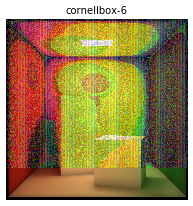

In [18]:
show(*test_img)
# show_grayscale(*test_img)
# show_split(*test_img, grayscale=False)
# show_split(*test_img, grayscale=True)

cornellbox-6 (bit plane 7)


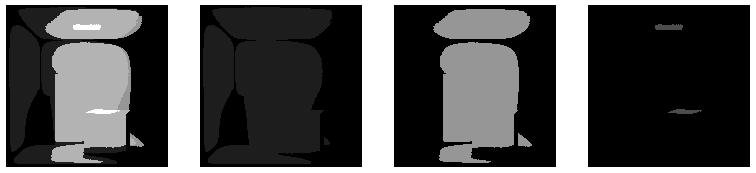

cornellbox-6 (bit plane 6)


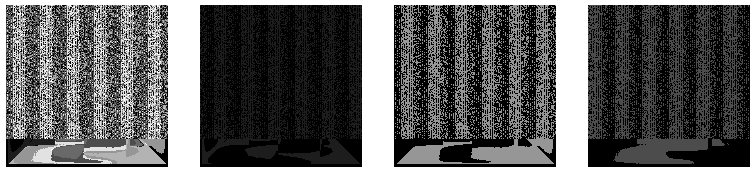

cornellbox-6 (bit plane 5)


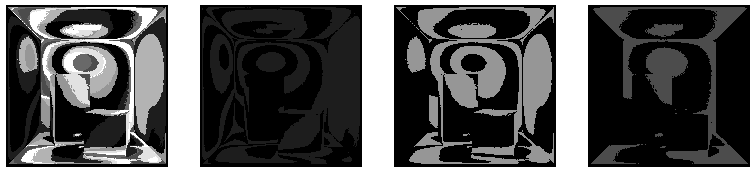

cornellbox-6 (bit plane 4)


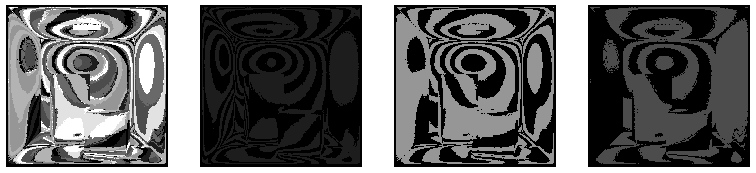

cornellbox-6 (bit plane 3)


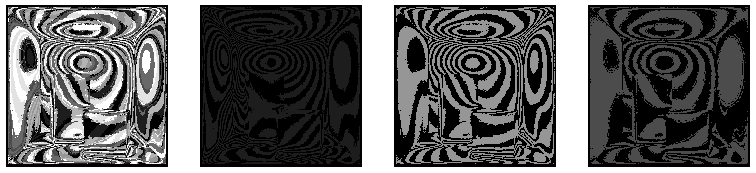

cornellbox-6 (bit plane 2)


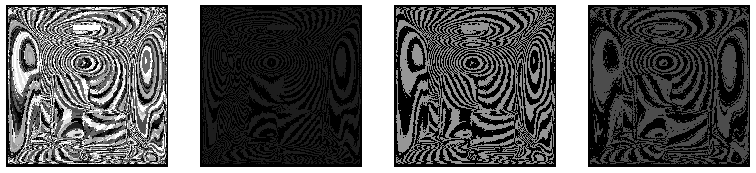

cornellbox-6 (bit plane 1)


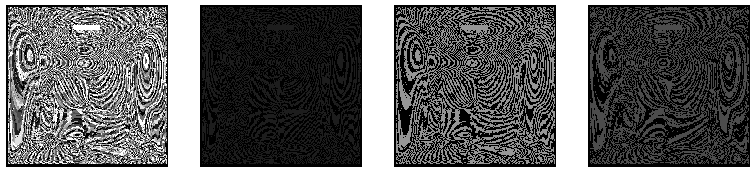

cornellbox-6 (bit plane 0)


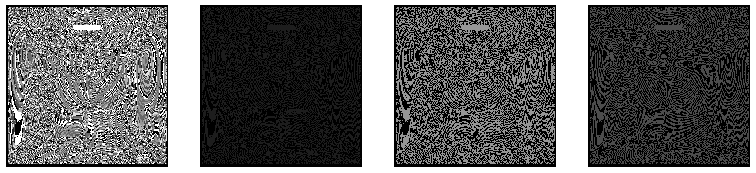

In [20]:
for plane in reversed(range(0, 8)):
    img = (test_img[0] >> plane) & 1
    img = np.where(img, 255, 0)
    title = f"{test_img[1]} (bit plane {plane})"
    print(title)
    # show(img, title)
    # plt.show()
#     show_split(img)
    show_split(img, grayscale=True)
    plt.show()